<font color = green >

## Home Task

</font>

Apply various clustering algorithms 

- Agglomerative clustering using `complete` linkage 
- Agglomerative clustering using `single` linkage 
- DBSCAN
- Use albow method to determine the best k for Kmeans


In [36]:
import numpy as np
import matplotlib.pyplot as plt

<font color = green >

###  Data 

</font>



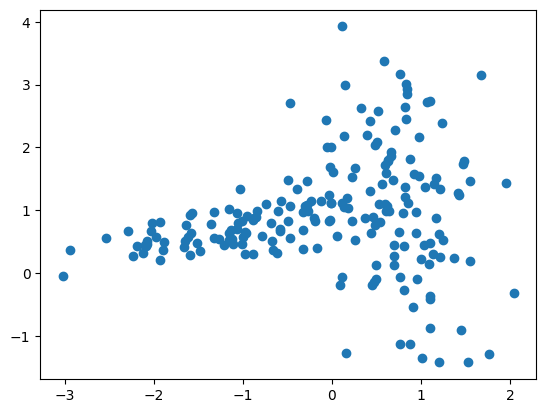

In [37]:
from sklearn.datasets import make_classification

X, _= make_classification(n_samples=200,
                            n_features=2,
                            n_informative=2,
                            n_redundant=0,
                            random_state=0,
                            n_clusters_per_class=1,
                            class_sep = 0.8)
plt.figure()
plt.scatter  (X[:,0], X[:,1])

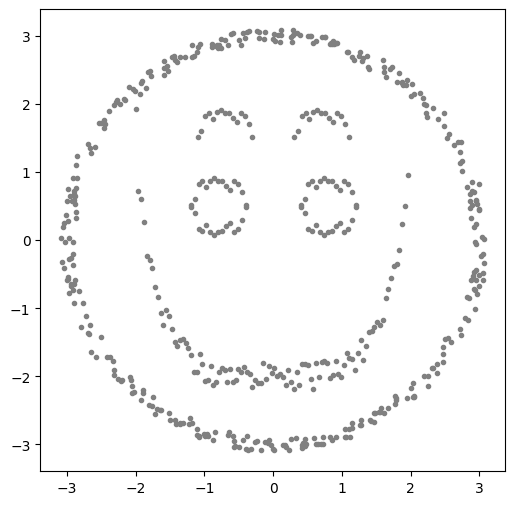

In [38]:
def get_smile_points(pos=True, n = 100):
    np.random.seed(42) 
    x_noise = np.random.uniform(-0.1,0.1,int(n*1.2))
    y_noise = np.random.uniform(-0.1,0.1,int(n*1.2))
    x= np.linspace (-3,3,n)
    x_add= np.linspace (-3,-2.9,int(n/10))

    x= np.r_[x,x_add, -x_add]
    y_circle = np.sqrt(9-x**2)+ y_noise

    X= np.r_[x+x_noise, x-x_noise]
    Y = np.r_[y_circle, -y_circle]

    x= np.linspace (-2,2,int(n/1.5))
    y_lips = -np.sqrt(16-x**2) +4.5 + 2*y_noise[:int(n/1.5)]
    X_smile= x
    Y_pos= -np.sqrt(16-x**4) +2 + 2*y_noise[:int(n/1.5)] 
    Y_neg= np.sqrt(16-x**2) - 4.5 + 2*y_noise[:int(n/1.5)]

    # X= np.r_[X,X_smile]
    # Y = np.r_[Y,Y_neg]

    x= np.linspace(-.4,.4,int(n/10))
    y_eye = np.sqrt(.17-x**2) - 0.05 + y_noise[:int(n/10)]

    X= np.r_[X,x-0.8,x-0.8, x+0.8, x+0.8 , x-0.7, x+0.7]
    Y = np.r_[Y,-y_eye+0.5, y_eye+0.5, -y_eye+0.5, y_eye+0.5, y_eye+1.5,  y_eye+1.5]

    X= np.r_[X,X_smile]
    Y_1 = np.r_[Y,Y_pos]
    Y_2 = np.r_[Y,Y_neg]
    if pos:
        return np.array(list((zip(X,Y_1))))
    else: 
        return np.array(list((zip(X,Y_2))))

plt.figure(figsize=(6,6))
points= get_smile_points(n=150)
plt.plot (points[:,0], points[:,1],'.',c= 'grey')



Text(0.5, 1.0, 'ward agglomerative')

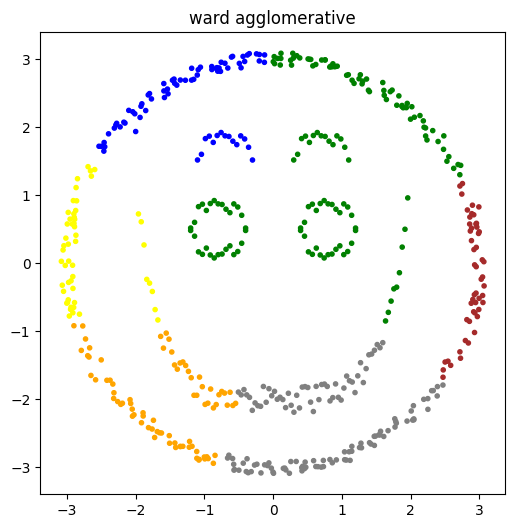

In [39]:
from sklearn.cluster import AgglomerativeClustering

clf = AgglomerativeClustering(n_clusters=6, linkage='ward')
predicted = clf.fit_predict(points)

plt.figure(figsize=(6,6))
colors=  np.array(['green','grey', 'orange', 'brown', 'blue', 'yellow'])
plt.scatter(points[:,0], points[:,1], c= colors[predicted], marker= '.')    
plt.title ('ward agglomerative')

Text(0.5, 1.0, 'complete agglomerative')

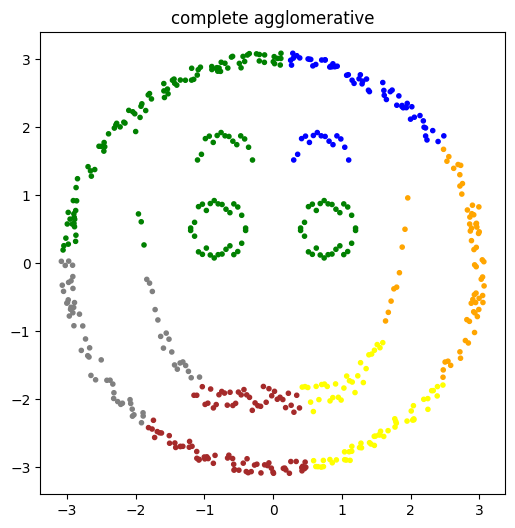

In [40]:
clf = AgglomerativeClustering(n_clusters=6, linkage='complete')
predicted = clf.fit_predict(points)

plt.figure(figsize=(6,6))
colors=  np.array(['green','grey', 'orange', 'brown', 'blue', 'yellow'])
plt.scatter(points[:,0], points[:,1], c= colors[predicted], marker= '.')    
plt.title ('complete agglomerative')

Text(0.5, 1.0, 'average agglomerative')

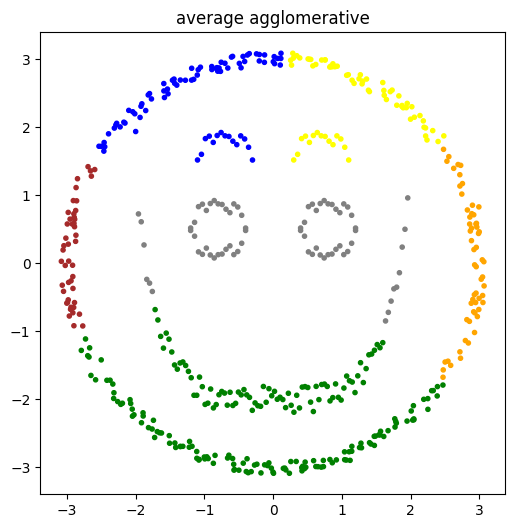

In [41]:
clf = AgglomerativeClustering(n_clusters=6, linkage='average')
predicted = clf.fit_predict(points)

plt.figure(figsize=(6,6))
colors=  np.array(['green','grey', 'orange', 'brown', 'blue', 'yellow'])
plt.scatter(points[:,0], points[:,1], c= colors[predicted], marker= '.')    
plt.title ('average agglomerative')

Text(0.5, 1.0, 'single agglomerative')

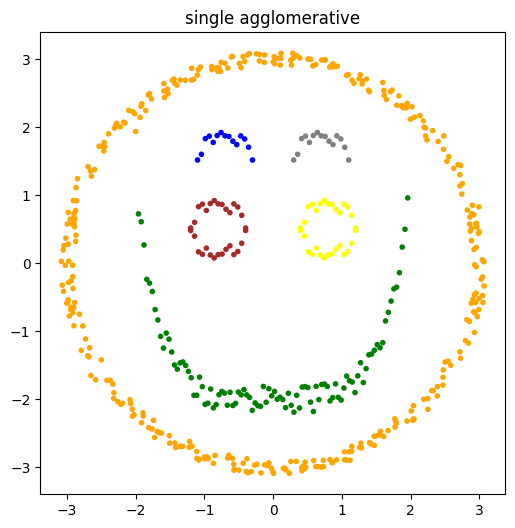

In [42]:
clf = AgglomerativeClustering(n_clusters=6, linkage='single')
predicted = clf.fit_predict(points)

plt.figure(figsize=(6,6))
colors=  np.array(['green','grey', 'orange', 'brown', 'blue', 'yellow', 'pink', 'violet'])
plt.scatter(points[:,0], points[:,1], c= colors[predicted], marker= '.')    
plt.title ('single agglomerative')

Text(0.5, 1.0, 'DBSCAN')

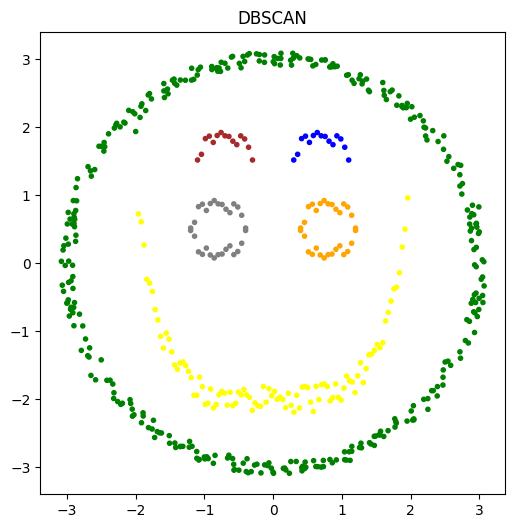

In [43]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.55, min_samples=2).fit(points)
predicted = dbscan.labels_

predicted[predicted == -1] = len(np.unique(predicted))-1


plt.figure(figsize=(6,6))
colors=  np.array(['green','grey', 'orange', 'brown', 'blue', 'yellow', 'pink', 'violet'])
plt.scatter(points[:,0], points[:,1], c= colors[predicted], marker= '.')    
plt.title ('DBSCAN')


1 : 1.2589242354917558
2 : 0.8832506962044162
3 : 0.7050320878533277
4 : 0.5996687153603514
5 : 0.5202013190432379
6 : 0.47456092437591396
7 : 0.41698500925942106
8 : 0.38953612457367504
9 : 0.3648066114091136


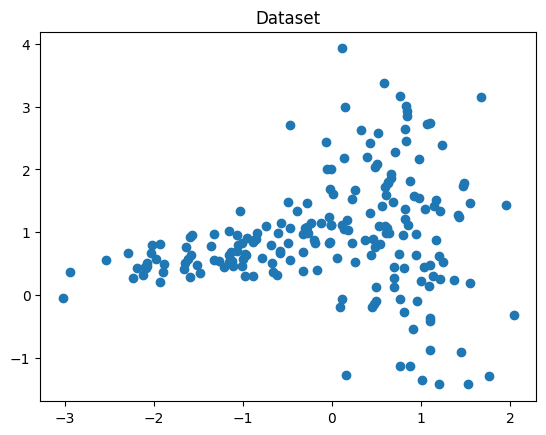

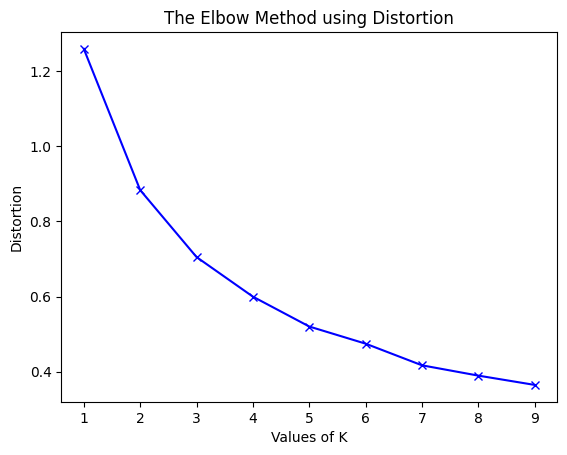

In [44]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_

for key, val in mapping1.items():
	print(f'{key} : {val}')

plt.plot()
plt.title('Dataset')
plt.scatter(X[:, 0], X[:, 1])
plt.show()

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

1 : 406.922663724203
2 : 223.97079448144794
3 : 128.3555432692471
4 : 91.53832497305712
5 : 68.10424013749319
6 : 56.1255188060082
7 : 45.0801606983417
8 : 39.463888716640234
9 : 35.366237517105745


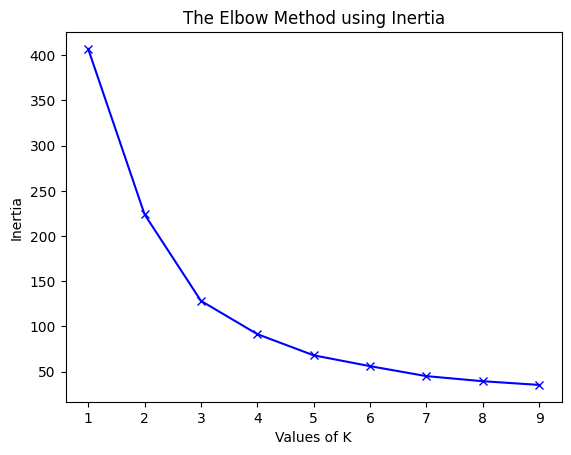

In [45]:
for key, val in mapping2.items():
	print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


**I would either choose 3 or 7 clusters depending on the goals.**